In [10]:
### Machine Running library install
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression

### 선형, 다중, 다항 회귀모델 라이브러리 정의
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### 앙상블 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

### visualization library
import matplotlib.pyplot as plt

# Definition of the NumPy library
import numpy as np

### Definition of Library (Preprocessing Library)
from sklearn.model_selection import train_test_split

### 오차행렬 및 오차행렬도 라이브러리 정의하기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# - 변환기 모델(클래스) 라이브러리 정의하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 정확도
from sklearn.metrics import accuracy_score
# 정밀도
from sklearn.metrics import precision_score
# 재현율
from sklearn.metrics import recall_score
# f1-score
from sklearn.metrics import f1_score


# - 결정트리 모델(클래스) 라이브러리 정의
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import pandas as pd 

import seaborn as sns


### 라이브러리 정의
from scipy.stats import spearmanr

### 라이브러리 정의
from scipy.stats import pearsonr

### 라이브러리 정의
from scipy.stats import randint, uniform


### 하이퍼파라미터 튜닝 모델(클래스) 정의하기
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

plt.rc("font", family="Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

### 경고 메시지 없애기
# - 사이킷런 버전에 따라 오류가 아니니 안내(경고)메시지가 자주 나타남
# - 안내(경고) 메시지 없이 실행할 수 있도록 처리
from sklearn import set_config
set_config(display="text")

from Classification import classification_analysis


In [2]:
"""
* 주제 : 와인종류 분류하기
* 사용데이터 : 08_wine.csv

<분석방법>
 - 스케일링 : 모든든 스케일러 방식 사용
 - 데이터분류 : 훈련:검증:테스트 = 6 : 2 : 2로 분류하여 사용
 - 튜닝 없이 전체 모델 훈련하여 ~ 평가까지..
 - 하이퍼파라메터 튜닝 후 전체 모델 훈련하여 ~ 평가까지..

<튜닝 속성>
 * 랜덤포레스트, 엑스트라트리, 그레디언트부스트
  - n_estimators = [50, 100]
    : 트리 갯수 지정(보통 50~1000 사이값 사용)
  - max_depth = [None, 10]
    : 트리가 뻗어나가는 최대깊이 지정(None은 제한없음, 보통 3~10 사이값 사용)
  - min_samples_split = [2, 5]
    : 노드를 분할하기 위한 최소한의 샘플 수 (보통 2~10 사이값 사용)
  - min_samples_leaf = [1, 2, 4]
    : 리프노드(결정노드)의 최소한의 샘플 수 (보통 1~10 사이값 사용)
    
 * 히스트그레디언트부스트
  - max_iter = [50, 100]
    : 트리 갯수 지정(보통 50~1000 사이값 사용)
  - max_depth = [None, 10]
    : 트리가 뻗어나가는 최대깊이 지정(None은 제한없음, 보통 3~10 사이값 사용)
  - min_samples_leaf = [1, 2, 4]
    : 리프노드(결정노드)의 최소한의 샘플 수 (보통 1~10 사이값 사용)
    
 * 엑스지부스트
  - n_estimators = [50, 100]
    : 트리 갯수 지정(보통 50~1000 사이값 사용)
  - max_depth = [None, 10]
    : 트리가 뻗어나가는 최대깊이 지정(None은 제한없음, 보통 3~10 사이값 사용)
  - min_child_weight = [1, 2, 4]
    : 리프노드(결정노드)의 최소한의 샘플 수 (보통 1~10 사이값 사용)

<튜닝 자동화 모델(GridSearchCV 클래스)에서 사용할 튜닝 속성>
 * scoring = accuracy
    : 튜닝 자동화 모델(클래스)에 사용할 평가 방법 지정
    : 분류에서는 정확도를 이용
 
 * refit = accuracy
    : 튜닝 자동화 모델(클래스)에 사용할 모델 선정 기준 지정
    : scoring에서 한가지만 사용되기에 생략가능
 
 * cv = 5
    : 튜닝 자동화 모델(클래스)에 사용할 "교차검증" 시 사용할 Fold 갯수
    : Fold(폴드) -> 모델 훈련시 사용할 훈련데이터를 내부적으로 
                 -> 폴드의 갯수만큼 다시 분류(훈련:검증으로)하여 사용하는 방법
                 
<최종 결과>
 * 데이터프레임에 아래 항목 저장하여 비교 후 모델 선정 (튜닝 전과 후로 각각 진행)
  - 모델명, 훈련정확도, 검증정확도, (훈련-검증)정확도, 정밀도, 재현율, F1-Score

 * 모델 선정 후, 테스트 데이터로 최종 예측 진행 (최종 선정 모델로 한번 진행)
"""

'\n* 주제 : 와인종류 분류하기\n* 사용데이터 : 08_wine.csv\n\n<분석방법>\n - 스케일링 : 모든든 스케일러 방식 사용\n - 데이터분류 : 훈련:검증:테스트 = 6 : 2 : 2로 분류하여 사용\n - 튜닝 없이 전체 모델 훈련하여 ~ 평가까지..\n - 하이퍼파라메터 튜닝 후 전체 모델 훈련하여 ~ 평가까지..\n\n<튜닝 속성>\n * 랜덤포레스트, 엑스트라트리, 그레디언트부스트\n  - n_estimators = [50, 100]\n    : 트리 갯수 지정(보통 50~1000 사이값 사용)\n  - max_depth = [None, 10]\n    : 트리가 뻗어나가는 최대깊이 지정(None은 제한없음, 보통 3~10 사이값 사용)\n  - min_samples_split = [2, 5]\n    : 노드를 분할하기 위한 최소한의 샘플 수 (보통 2~10 사이값 사용)\n  - min_samples_leaf = [1, 2, 4]\n    : 리프노드(결정노드)의 최소한의 샘플 수 (보통 1~10 사이값 사용)\n    \n * 히스트그레디언트부스트\n  - max_iter = [50, 100]\n    : 트리 갯수 지정(보통 50~1000 사이값 사용)\n  - max_depth = [None, 10]\n    : 트리가 뻗어나가는 최대깊이 지정(None은 제한없음, 보통 3~10 사이값 사용)\n  - min_samples_leaf = [1, 2, 4]\n    : 리프노드(결정노드)의 최소한의 샘플 수 (보통 1~10 사이값 사용)\n    \n * 엑스지부스트\n  - n_estimators = [50, 100]\n    : 트리 갯수 지정(보통 50~1000 사이값 사용)\n  - max_depth = [None, 10]\n    : 트리가 뻗어나가는 최대깊이 지정(None은 제한없음, 보통 3~10 사이값 사용)\n  - min_child_weight = [1, 2, 4]\n    : 리프노드(결정노드)의 최소한의 샘플

In [11]:
### 데이터 불러들이기
wine = pd.read_csv("./data/08_wine.csv")
wine.info()
wine.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0


In [12]:
### 독립변수, 종속변수로 분리하기
data = wine.iloc[:, :-1]
target = wine["class"]

# data, target


In [13]:
### 데이터분류: 훈련:검증:테스트 = 6 : 2 : 2로 분류하여 사용
train_input, val_input, train_target, val_target = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)
train_input, test_input, train_target, test_target = train_test_split(train_input, train_target, test_size=0.25, random_state=42, stratify=train_target)

print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)
print(test_input.shape, test_target.shape)


(3897, 3) (3897,)
(1300, 3) (1300,)
(1300, 3) (1300,)


### 튜닝 없이 전체 모델 훈련

RandomForestClassifier 적용 - 훈련정확도: 0.997947138824737, 테스트정확도: 0.9069230769230769, 과적합여부: 0.09102406190166001
사용가능한 과적합 상태입니다.
정확도:0.9069, 정밀도:0.9334, 재현율:0.9439, f1-score:0.9386


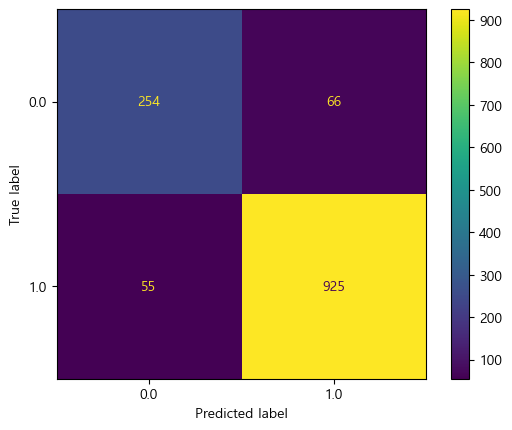


ExtraTreesClassifier 적용 - 훈련정확도: 0.997947138824737, 테스트정확도: 0.8946153846153846, 과적합여부: 0.10333175420935237
과대적합으로 판단됩니다.
정확도:0.8946, 정밀도:0.9245, 재현율:0.9367, f1-score:0.9306


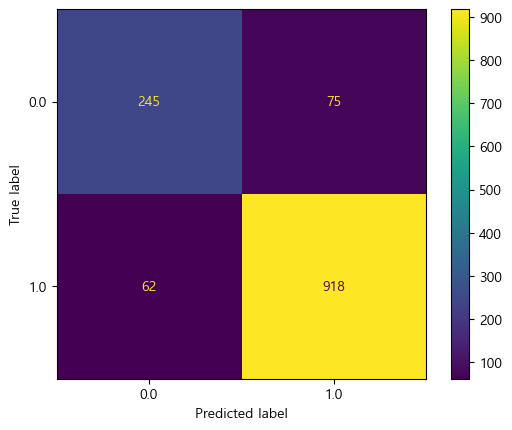


GradientBoostingClassifier 적용 - 훈련정확도: 0.8829869130100076, 테스트정확도: 0.8876923076923077, 과적합여부: -0.004705394682300024
과소적합이 발생하였습니다.
정확도:0.8877, 정밀도:0.9246, 재현율:0.9265, f1-score:0.9256


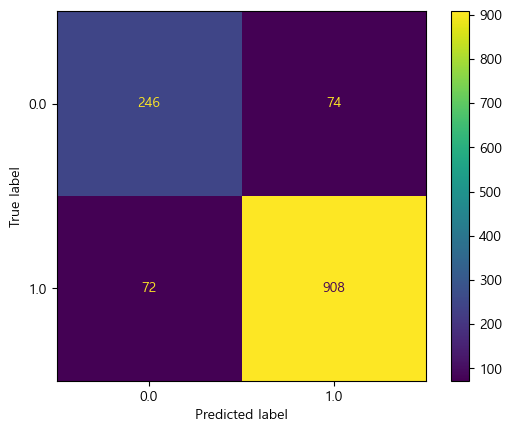


HistGradientBoostingClassifier 적용 - 훈련정확도: 0.9309725429817809, 테스트정확도: 0.8961538461538462, 과적합여부: 0.0348186968279347
사용가능한 과적합 상태입니다.
정확도:0.8962, 정밀도:0.9307, 재현율:0.9316, f1-score:0.9312


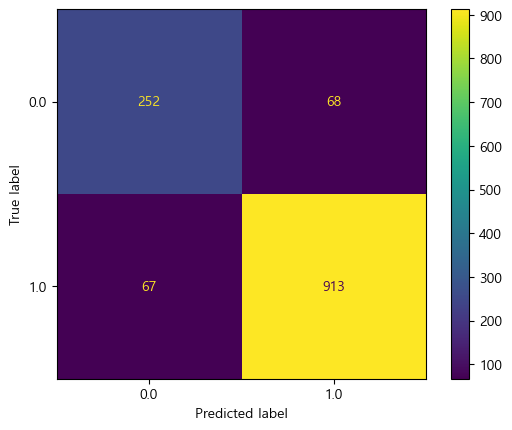


XGBClassifier 적용 - 훈련정확도: 0.9574031306132923, 테스트정확도: 0.8938461538461538, 과적합여부: 0.06355697676713845
사용가능한 과적합 상태입니다.
정확도:0.8938, 정밀도:0.9296, 재현율:0.9296, f1-score:0.9296


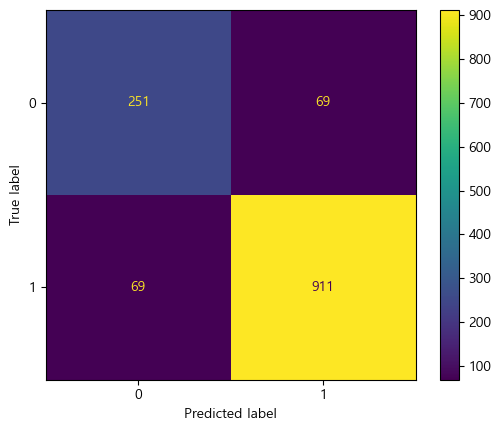

In [ ]:
rf  = RandomForestClassifier()
et  = ExtraTreesClassifier()
gb  = GradientBoostingClassifier()
hgb = HistGradientBoostingClassifier()
xgb = XGBClassifier()

models = [rf, et, gb, hgb, xgb]

for model in models:
    model.fit(train_input, train_target)
    train_score = model.score(train_input, train_target)
    test_score = model.score(test_input, test_target)

    print(f"{model.__class__.__name__} 적용 - 훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")

    if train_score - test_score > 0.1:
        print("과대적합으로 판단됩니다.")
        
    elif train_score - test_score < 0:
        print("과소적합이 발생하였습니다.")
            
    else:
        print("사용가능한 과적합 상태입니다.")

    test_pred = model.predict(test_input)

    ### 정확도
    acc = accuracy_score(test_target, test_pred)

    ### 정밀도
    pre = precision_score(test_target, test_pred)

    ### 재현율
    rec = recall_score(test_target, test_pred)

    ### f1-score
    f1 = f1_score(test_target, test_pred)

    print(f"정확도:{acc:.4f}, 정밀도:{pre:.4f}, 재현율:{rec:.4f}, f1-score:{f1:.4f}")

    cm = confusion_matrix(test_target, test_pred, labels=model.classes_)
    dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    dist.plot()
    plt.show()
    print("")

    ### 모델 선정
    # HistGradientBoostingClassifier
    # 훈련 정확도: 0.9310, 테스트 정확도: 0.8962
    # 과적합 여부: 0.0348 (사용 가능한 과적합 상태)
    # 정확도: 0.8962, 정밀도: 0.9307, 재현율: 0.9316, f1-score: 0.9312
    # (해석)
    # HistGradientBoostingClassifier는 훈련 정확도와 테스트 정확도의 차이가 적고, 과적합이 잘 조절된 상태
    # 성능 지표도 높은 수준을 기록하고 있으며, 안정적인 모델로 판단됨.
    # 과적합이 과도하게 발생하지 않으며, 성능 지표가 전반적으로 우수한 상태임
    # (선정 이유)
    # HistGradientBoostingClassifier가 전반적으로 성능이 우수하고 과적합 문제도 잘 조절되어 있어 가장 안정적인 모델임
    # 만약 추가적인 성능 향상을 위해 튜닝을 진행하고 싶다면 RandomForestClassifier 또는 ExtraTreesClassifier도 선택할 수 있으나, 과적합 문제를 해결한 후 재평가가 필요
    # XGBClassifier도 좋은 선택이지만, HistGradientBoostingClassifier와 큰 차이가 없어 성능 차이를 고려할 때 두 모델 모두 적합


모델: RandomForestClassifier
--- StandardScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8761538461538462, 과적합여부: 0.12153668502398296
과대적합으로 판단됩니다.
정확도:0.8762, 정밀도:0.8402, 재현율:0.8395, f1-score:0.8398


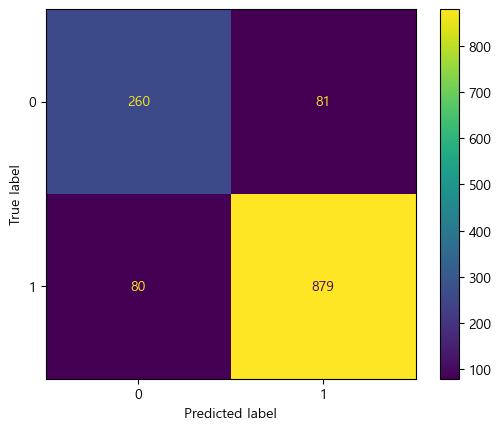


--- MinMaxScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.88, 과적합여부: 0.11769053117782913
과대적합으로 판단됩니다.
정확도:0.8800, 정밀도:0.8457, 재현율:0.8431, f1-score:0.8444


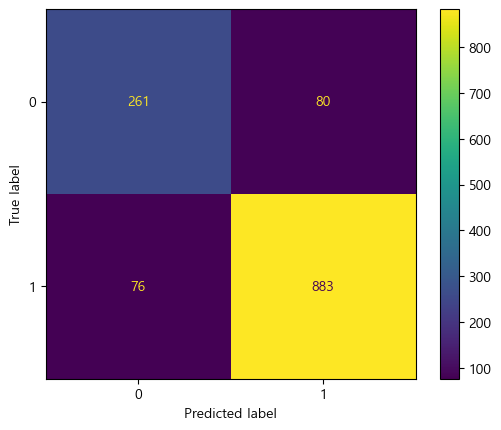


--- RobustScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8776923076923077, 과적합여부: 0.11999822348552147
과대적합으로 판단됩니다.
정확도:0.8777, 정밀도:0.8422, 재현율:0.8415, f1-score:0.8418


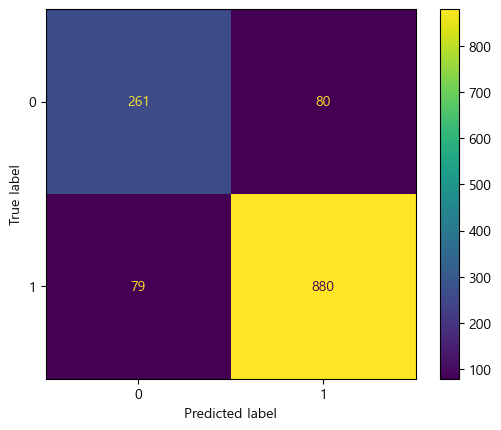



--- Polynomial Features ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8853846153846154, 과적합여부: 0.1123059157932137
과대적합으로 판단됩니다.
정확도:0.8854, 정밀도:0.8506, 재현율:0.8552, f1-score:0.8529


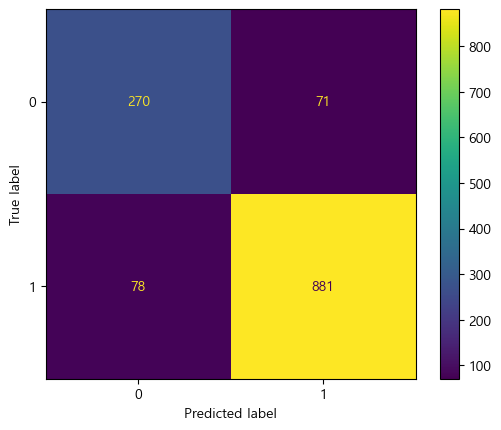



모델: ExtraTreesClassifier
--- StandardScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8676923076923077, 과적합여부: 0.12999822348552148
과대적합으로 판단됩니다.
정확도:0.8677, 정밀도:0.8297, 재현율:0.8272, f1-score:0.8284


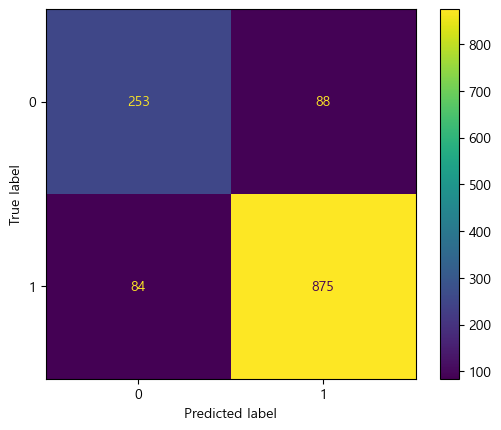


--- MinMaxScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8646153846153846, 과적합여부: 0.13307514656244457
과대적합으로 판단됩니다.
정확도:0.8646, 정밀도:0.8270, 재현율:0.8194, f1-score:0.8231


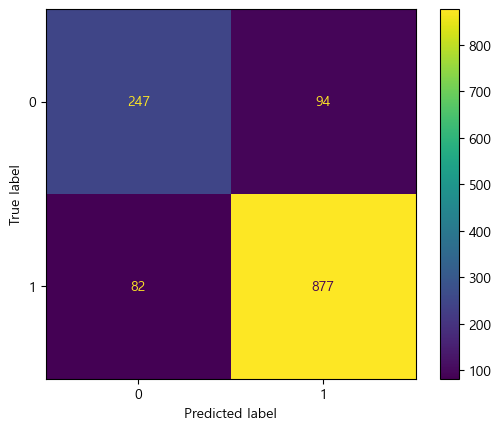


--- RobustScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8676923076923077, 과적합여부: 0.12999822348552148
과대적합으로 판단됩니다.
정확도:0.8677, 정밀도:0.8307, 재현율:0.8243, f1-score:0.8274


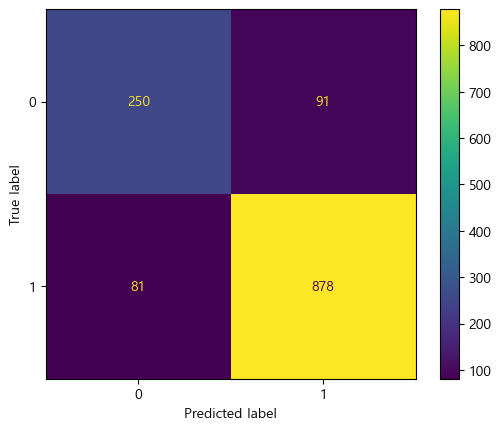



--- Polynomial Features ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8684615384615385, 과적합여부: 0.12922899271629062
과대적합으로 판단됩니다.
정확도:0.8685, 정밀도:0.8291, 재현율:0.8334, f1-score:0.8312


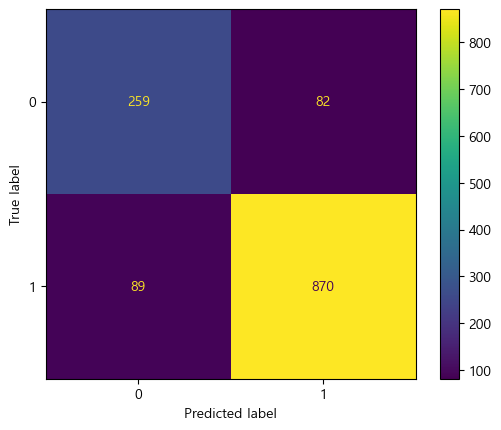



모델: GradientBoostingClassifier
--- StandardScaler 적용 ---
훈련정확도: 0.8868360277136259, 테스트정확도: 0.8615384615384616, 과적합여부: 0.02529756617516432
사용가능한 과적합 상태입니다.
정확도:0.8615, 정밀도:0.8211, 재현율:0.8211, f1-score:0.8211


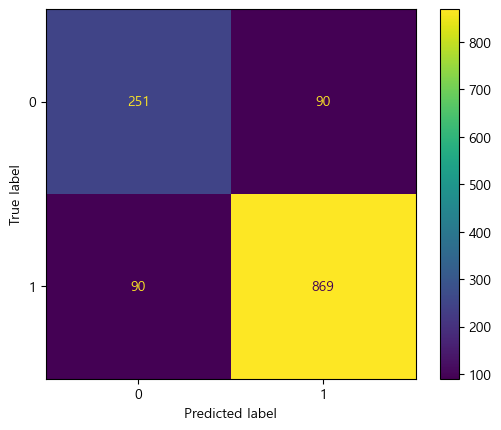


--- MinMaxScaler 적용 ---
훈련정확도: 0.8868360277136259, 테스트정확도: 0.8615384615384616, 과적합여부: 0.02529756617516432
사용가능한 과적합 상태입니다.
정확도:0.8615, 정밀도:0.8211, 재현율:0.8211, f1-score:0.8211


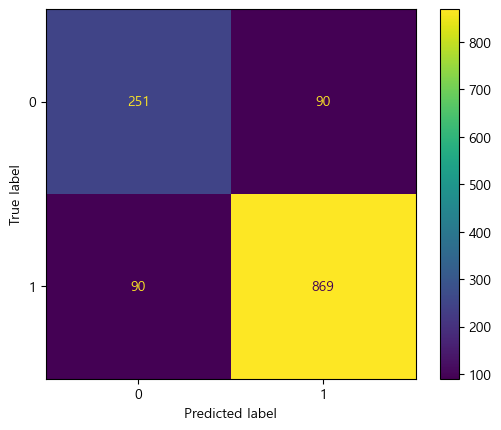


--- RobustScaler 적용 ---
훈련정확도: 0.8868360277136259, 테스트정확도: 0.8615384615384616, 과적합여부: 0.02529756617516432
사용가능한 과적합 상태입니다.
정확도:0.8615, 정밀도:0.8211, 재현율:0.8211, f1-score:0.8211


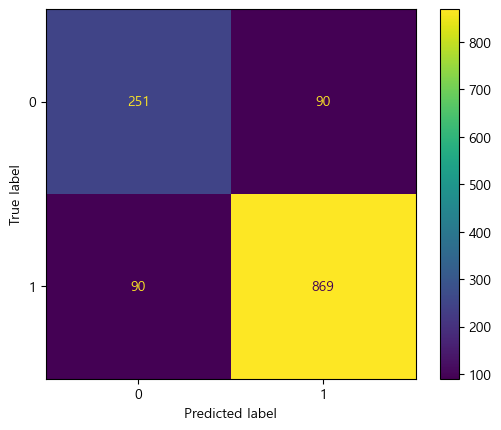



--- Polynomial Features ---
훈련정확도: 0.8942776494739543, 테스트정확도: 0.8630769230769231, 과적합여부: 0.031200726397031198
사용가능한 과적합 상태입니다.
정확도:0.8631, 정밀도:0.8240, 재현율:0.8203, f1-score:0.8221


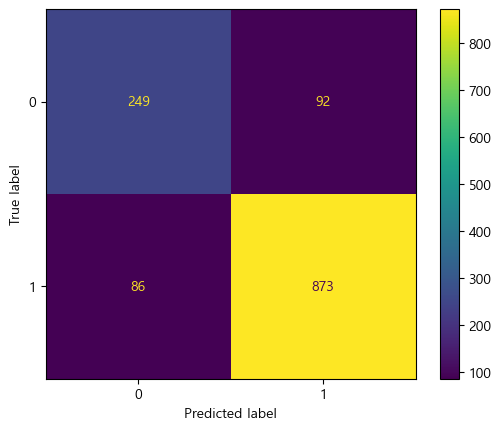



모델: HistGradientBoostingClassifier
--- StandardScaler 적용 ---
훈련정확도: 0.9343084423915833, 테스트정확도: 0.8692307692307693, 과적합여부: 0.06507767316081403
사용가능한 과적합 상태입니다.
정확도:0.8692, 정밀도:0.8294, 재현율:0.8367, f1-score:0.8329


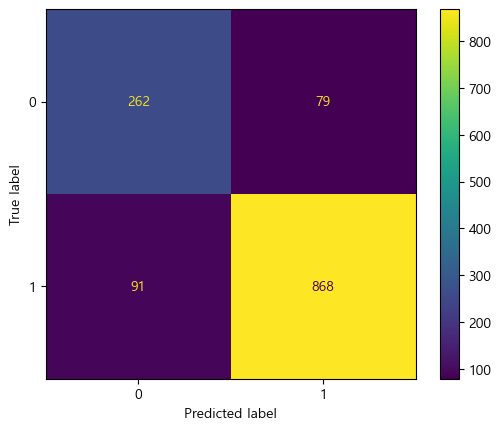


--- MinMaxScaler 적용 ---
훈련정확도: 0.9343084423915833, 테스트정확도: 0.8692307692307693, 과적합여부: 0.06507767316081403
사용가능한 과적합 상태입니다.
정확도:0.8692, 정밀도:0.8294, 재현율:0.8367, f1-score:0.8329


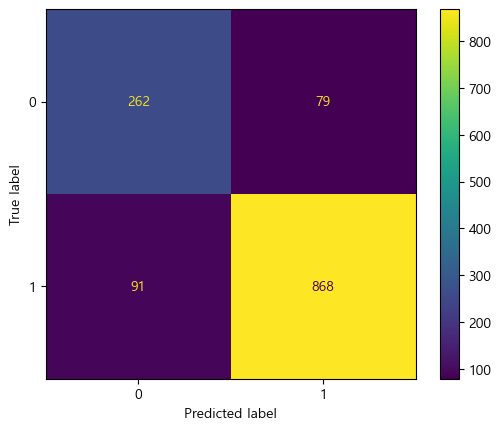


--- RobustScaler 적용 ---
훈련정확도: 0.9343084423915833, 테스트정확도: 0.8692307692307693, 과적합여부: 0.06507767316081403
사용가능한 과적합 상태입니다.
정확도:0.8692, 정밀도:0.8294, 재현율:0.8367, f1-score:0.8329


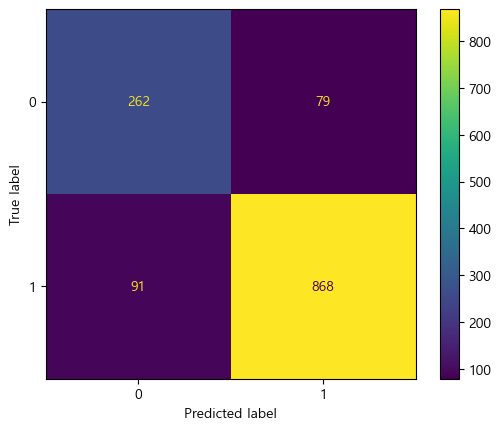



--- Polynomial Features ---
훈련정확도: 0.9515011547344111, 테스트정확도: 0.8715384615384615, 과적합여부: 0.07996269319594962
사용가능한 과적합 상태입니다.
정확도:0.8715, 정밀도:0.8327, 재현율:0.8383, f1-score:0.8354


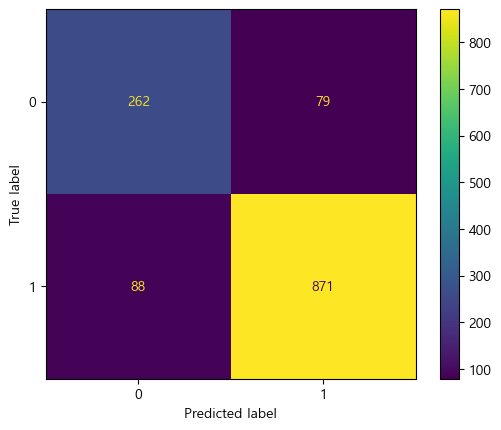



모델: XGBClassifier
--- StandardScaler 적용 ---
훈련정확도: 0.9563767000256608, 테스트정확도: 0.8676923076923077, 과적합여부: 0.08868439233335312
사용가능한 과적합 상태입니다.
정확도:0.8677, 정밀도:0.8282, 재현율:0.8319, f1-score:0.8300


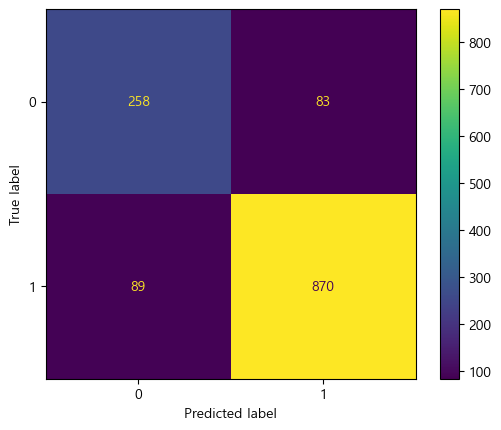


--- MinMaxScaler 적용 ---
훈련정확도: 0.9563767000256608, 테스트정확도: 0.8676923076923077, 과적합여부: 0.08868439233335312
사용가능한 과적합 상태입니다.
정확도:0.8677, 정밀도:0.8282, 재현율:0.8319, f1-score:0.8300


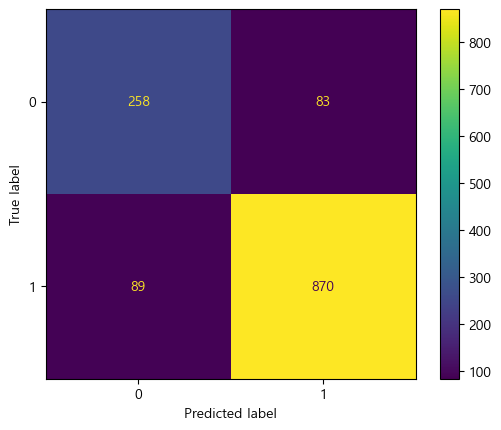


--- RobustScaler 적용 ---
훈련정확도: 0.9563767000256608, 테스트정확도: 0.8676923076923077, 과적합여부: 0.08868439233335312
사용가능한 과적합 상태입니다.
정확도:0.8677, 정밀도:0.8282, 재현율:0.8319, f1-score:0.8300


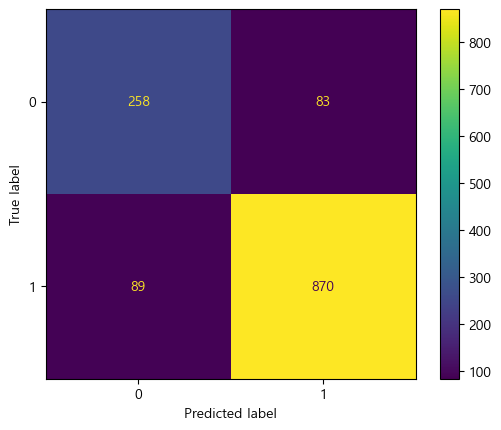



--- Polynomial Features ---
훈련정확도: 0.9758788811906595, 테스트정확도: 0.88, 과적합여부: 0.09587888119065946
사용가능한 과적합 상태입니다.
정확도:0.8800, 정밀도:0.8439, 재현율:0.8478, f1-score:0.8458


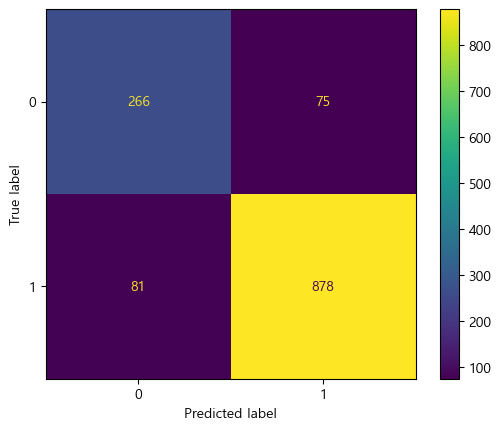

In [ ]:
wine_org = classification_analysis(
    data=wine,  
    target_column='class',
    test_size=0.2,
    random_state=42
)

# 모델 훈련 및 평가
wine_org.train_and_evaluate(param_grids=None)



### 모델 선정
# HistGradientBoostingClassifier
# 훈련 정확도: 0.9343, 테스트 정확도: 0.8692
# 과적합 여부: 0.0651 (사용 가능한 과적합 상태)
# 정확도: 0.8692, 정밀도: 0.8294, 재현율: 0.8367, f1-score: 0.8329
# (해석):
# HistGradientBoostingClassifier는 훈련 정확도와 테스트 정확도의 차이가 적고, 과적합이 잘 조절된 상태.
# 성능 지표도 높은 수준을 기록하고 있으며, 안정적인 모델로 판단.
# 과적합이 과도하게 발생하지 않으며, 성능 지표가 전반적으로 우수한 상태.
# (선정 이유):
# HistGradientBoostingClassifier는 과적합 문제도 잘 해결되었고, 전반적으로 안정적인 성능을 보이고 있어 가장 적합한 모델로 선정.
# 성능 향상을 위해 추가적인 튜닝을 고려할 수 있으나, 현 상태에서도 좋은 결과를 보이고 있음.



모델: RandomForestClassifier
Fitting 5 folds for each of 24 candidates, totalling 120 fits
최적 파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
--- StandardScaler 적용 ---
훈련정확도: 0.9974339235309212, 테스트정확도: 0.8776923076923077, 과적합여부: 0.11974161583861354
과대적합으로 판단됩니다.
정확도:0.8777, 정밀도:0.8411, 재현율:0.8443, f1-score:0.8427


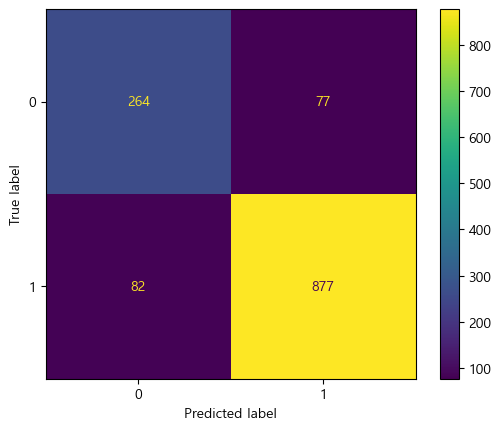


--- MinMaxScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.88, 과적합여부: 0.11769053117782913
과대적합으로 판단됩니다.
정확도:0.8800, 정밀도:0.8453, 재현율:0.8440, f1-score:0.8447


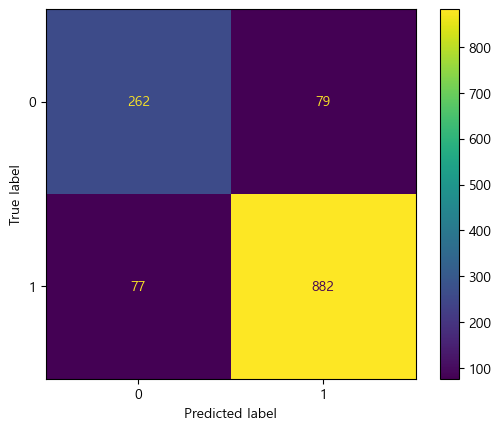


--- RobustScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8776923076923077, 과적합여부: 0.11999822348552147
과대적합으로 판단됩니다.
정확도:0.8777, 정밀도:0.8411, 재현율:0.8443, f1-score:0.8427


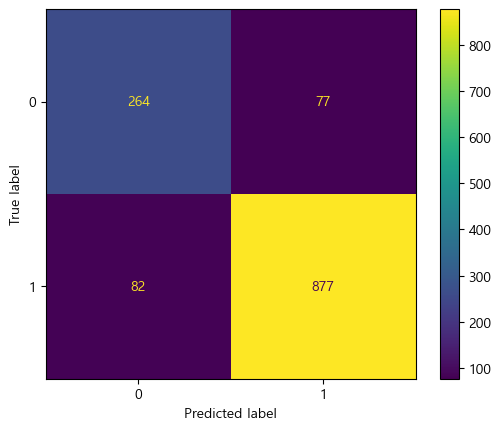



--- Polynomial Features ---
훈련정확도: 0.9974339235309212, 테스트정확도: 0.8769230769230769, 과적합여부: 0.12051084660784428
과대적합으로 판단됩니다.
정확도:0.8769, 정밀도:0.8394, 재현율:0.8457, f1-score:0.8425


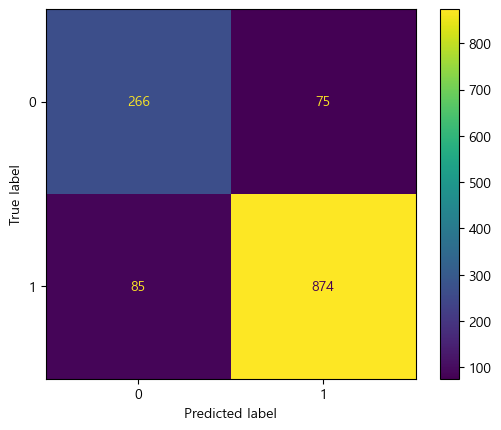



모델: ExtraTreesClassifier
Fitting 5 folds for each of 24 candidates, totalling 120 fits
최적 파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
--- StandardScaler 적용 ---
훈련정확도: 0.9794713882473698, 테스트정확도: 0.8776923076923077, 과적합여부: 0.10177908055506213
과대적합으로 판단됩니다.
정확도:0.8777, 정밀도:0.8477, 재현율:0.8292, f1-score:0.8378


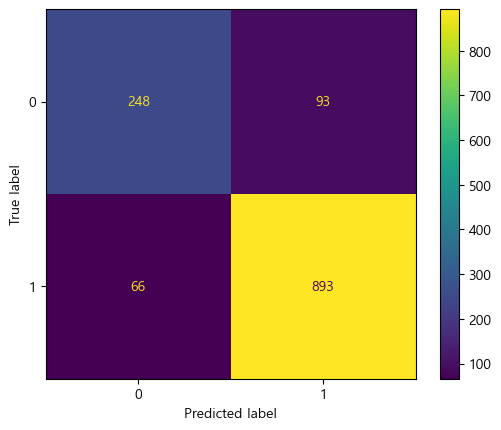


--- MinMaxScaler 적용 ---
훈련정확도: 0.9799846035411856, 테스트정확도: 0.8746153846153846, 과적합여부: 0.10536921892580098
과대적합으로 판단됩니다.
정확도:0.8746, 정밀도:0.8435, 재현율:0.8253, f1-score:0.8337


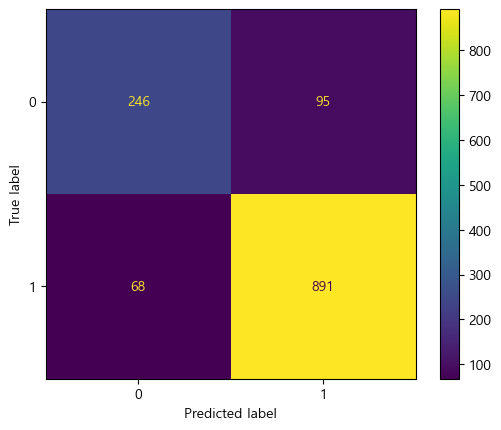


--- RobustScaler 적용 ---
훈련정확도: 0.9799846035411856, 테스트정확도: 0.8769230769230769, 과적합여부: 0.10306152661810863
과대적합으로 판단됩니다.
정확도:0.8769, 정밀도:0.8459, 재현율:0.8296, f1-score:0.8372


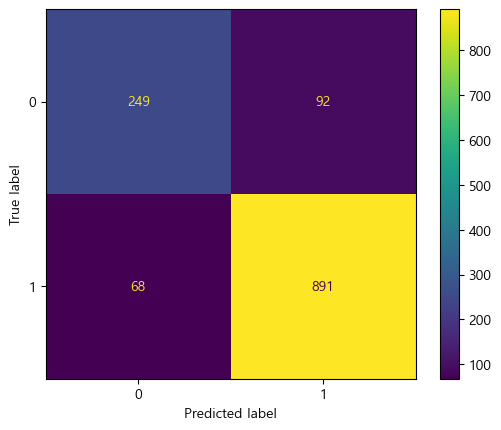



--- Polynomial Features ---
훈련정확도: 0.9928149858865795, 테스트정확도: 0.8723076923076923, 과적합여부: 0.12050729357888712
과대적합으로 판단됩니다.
정확도:0.8723, 정밀도:0.8341, 재현율:0.8379, f1-score:0.8360


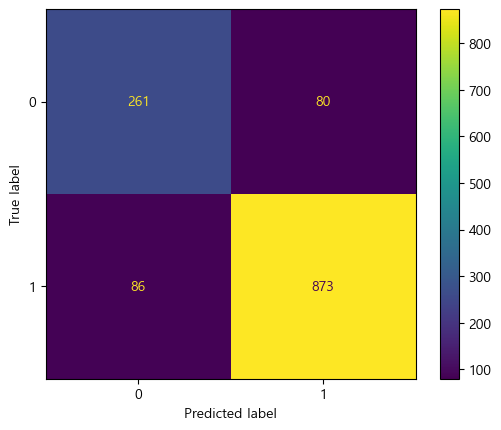



모델: GradientBoostingClassifier
Fitting 5 folds for each of 24 candidates, totalling 120 fits
최적 파라미터: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
--- StandardScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8723076923076923, 과적합여부: 0.1253828388701368
과대적합으로 판단됩니다.
정확도:0.8723, 정밀도:0.8341, 재현율:0.8379, f1-score:0.8360


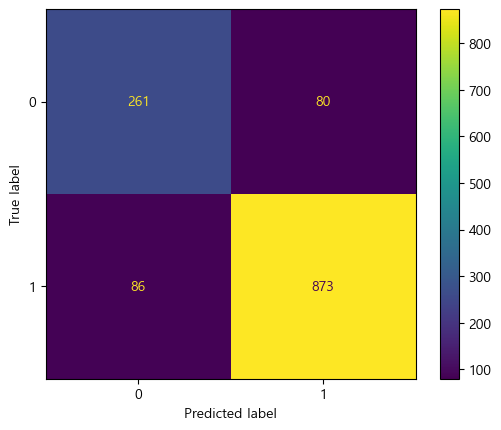


--- MinMaxScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8746153846153846, 과적합여부: 0.12307514656244456
과대적합으로 판단됩니다.
정확도:0.8746, 정밀도:0.8369, 재현율:0.8413, f1-score:0.8391


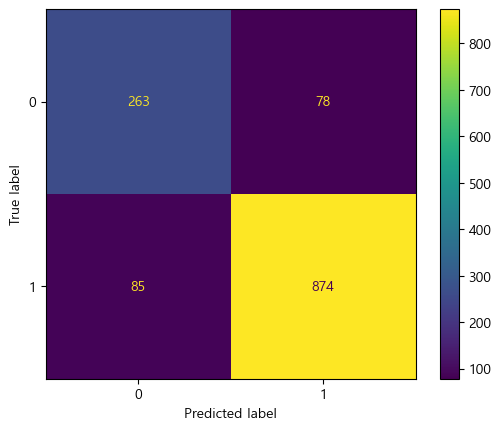


--- RobustScaler 적용 ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8753846153846154, 과적합여부: 0.1223059157932137
과대적합으로 판단됩니다.
정확도:0.8754, 정밀도:0.8377, 재현율:0.8428, f1-score:0.8402


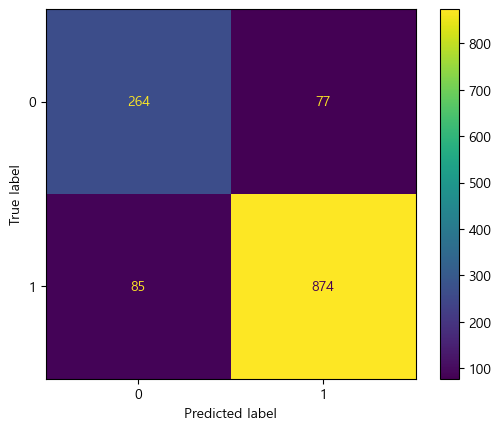



--- Polynomial Features ---
훈련정확도: 0.9976905311778291, 테스트정확도: 0.8676923076923077, 과적합여부: 0.12999822348552148
과대적합으로 판단됩니다.
정확도:0.8677, 정밀도:0.8279, 재현율:0.8328, f1-score:0.8303


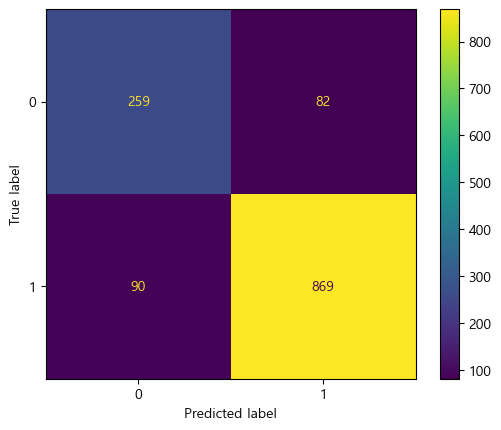



모델: HistGradientBoostingClassifier
Fitting 5 folds for each of 12 candidates, totalling 60 fits
최적 파라미터: {'max_depth': 10, 'max_iter': 100, 'min_samples_leaf': 1}
--- StandardScaler 적용 ---
훈련정확도: 0.9504747241467796, 테스트정확도: 0.8684615384615385, 과적합여부: 0.08201318568524107
사용가능한 과적합 상태입니다.
정확도:0.8685, 정밀도:0.8272, 재현율:0.8409, f1-score:0.8336


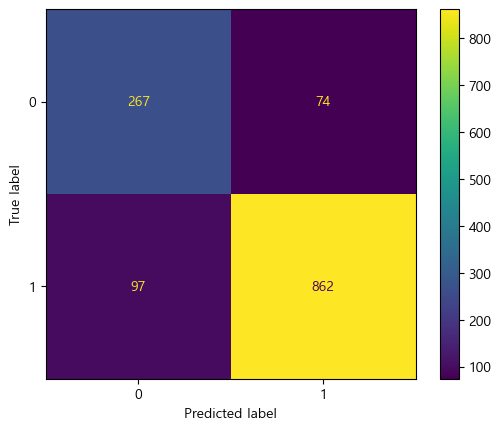


--- MinMaxScaler 적용 ---
훈련정확도: 0.9504747241467796, 테스트정확도: 0.8684615384615385, 과적합여부: 0.08201318568524107
사용가능한 과적합 상태입니다.
정확도:0.8685, 정밀도:0.8272, 재현율:0.8409, f1-score:0.8336


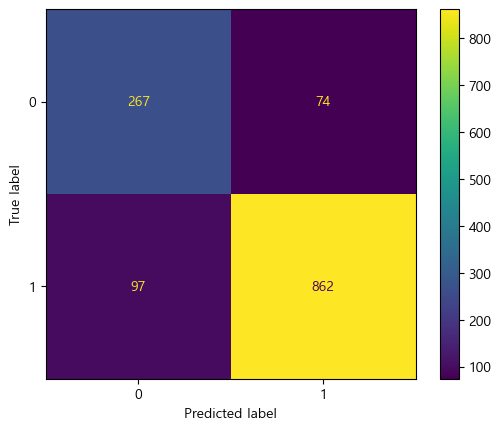


--- RobustScaler 적용 ---
훈련정확도: 0.9504747241467796, 테스트정확도: 0.8684615384615385, 과적합여부: 0.08201318568524107
사용가능한 과적합 상태입니다.
정확도:0.8685, 정밀도:0.8272, 재현율:0.8409, f1-score:0.8336


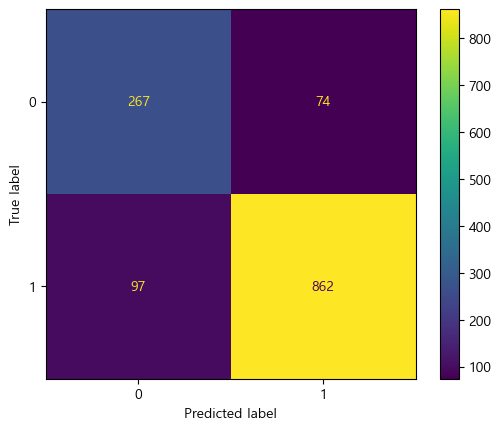



--- Polynomial Features ---
훈련정확도: 0.9702335129586862, 테스트정확도: 0.88, 과적합여부: 0.0902335129586862
사용가능한 과적합 상태입니다.
정확도:0.8800, 정밀도:0.8443, 재현율:0.8469, f1-score:0.8455


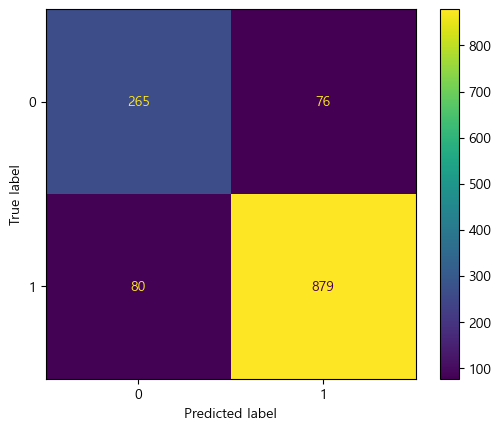



모델: XGBClassifier
Fitting 5 folds for each of 12 candidates, totalling 60 fits
최적 파라미터: {'max_depth': None, 'min_child_weight': 1, 'n_estimators': 100}
--- StandardScaler 적용 ---
훈련정확도: 0.9563767000256608, 테스트정확도: 0.8676923076923077, 과적합여부: 0.08868439233335312
사용가능한 과적합 상태입니다.
정확도:0.8677, 정밀도:0.8282, 재현율:0.8319, f1-score:0.8300


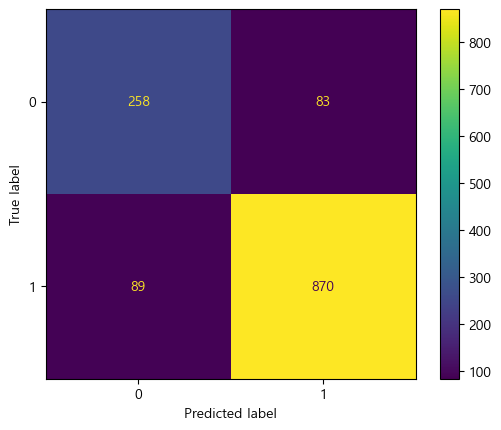


--- MinMaxScaler 적용 ---
훈련정확도: 0.9563767000256608, 테스트정확도: 0.8676923076923077, 과적합여부: 0.08868439233335312
사용가능한 과적합 상태입니다.
정확도:0.8677, 정밀도:0.8282, 재현율:0.8319, f1-score:0.8300


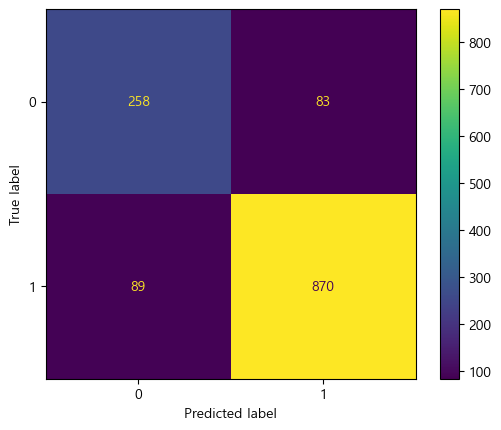


--- RobustScaler 적용 ---
훈련정확도: 0.9563767000256608, 테스트정확도: 0.8676923076923077, 과적합여부: 0.08868439233335312
사용가능한 과적합 상태입니다.
정확도:0.8677, 정밀도:0.8282, 재현율:0.8319, f1-score:0.8300


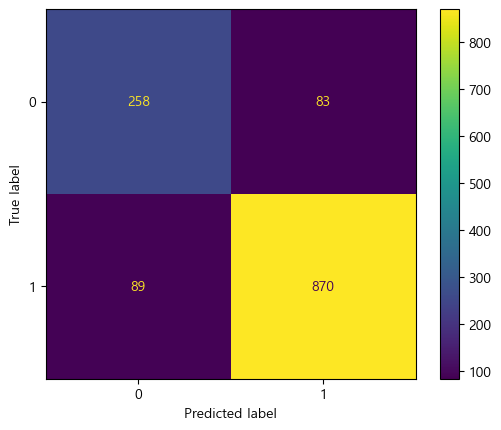



--- Polynomial Features ---
훈련정확도: 0.9758788811906595, 테스트정확도: 0.88, 과적합여부: 0.09587888119065946
사용가능한 과적합 상태입니다.
정확도:0.8800, 정밀도:0.8439, 재현율:0.8478, f1-score:0.8458


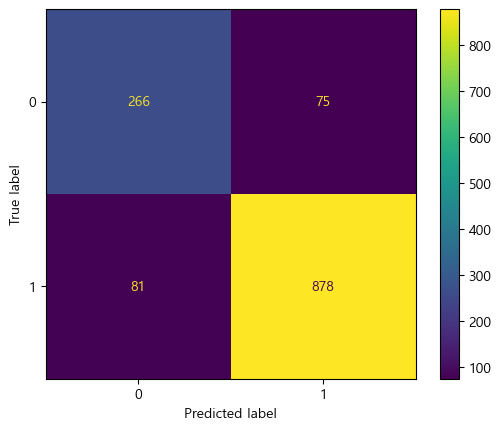

In [ ]:
wine_org = classification_analysis(
    data=wine,  
    target_column='class',
    test_size=0.2,
    poly_degree=2,
    random_state=42
)


param_grids = {
    'RandomForestClassifier': {
        "n_estimators": [50, 100],
        "max_depth": [None, 10],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2, 4]
    },

    'ExtraTreesClassifier': {
        "n_estimators": [50, 100],
        "max_depth": [None, 10],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2, 4]
    },

    'GradientBoostingClassifier': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4]
    },

    'HistGradientBoostingClassifier': {
        'max_iter': [50, 100],
        'max_depth': [None, 10],
        'min_samples_leaf': [1, 2, 4]
    },

    'XGBClassifier': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_child_weight': [1, 2, 4]
    }
}

# 모델 훈련 및 평가
wine_org.train_and_evaluate(param_grids=param_grids)


# 모델 선정: XGBClassifier
# 훈련 정확도: 0.9759, 테스트 정확도: 0.8800
# 과적합 여부: 0.0959 (사용 가능한 과적합 상태)
# 정확도: 0.8800, 정밀도: 0.8439, 재현율: 0.8478, f1-score: 0.8458
# (해석):

# XGBClassifier는 훈련 정확도와 테스트 정확도의 차이가 적고, 과적합이 잘 조절된 상태.
# 성능 지표가 매우 우수하며, 특히 f1-score가 0.8458로 높은 수준을 기록하여 매우 안정적이고 신뢰할 수 있는 모델.
# 다항특성공학을 적용한 후 성능이 향상된 결과도 확인.
# (선정 이유):

# XGBClassifier는 성능이 뛰어나고 과적합도 잘 관리되어 있어 가장 적합한 모델로 선정.
# 이 모델이 현재 가장 우수한 성능을 보이며, 추가적인 튜닝을 통해 더 개선할 가능성도 있음.